In [1]:
import warnings
import pandas as pd 
import numpy as np

from codetriangle.sentropies import *
from codetriangle.jentropies import *
from codetriangle.coordsentropic import *
from codetriangle.entropytriangle import *
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = ['sepal length','sepal width','petal length','petal width','class'])
df = discretization(df)
y = df['class']
df = df.drop(['class'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.8)

50


/Users/jaime.de.los.rios/Documents/Jupyter Prueba Fran/codetriangle/auxfunc.py:35: UserWarning: Discretizing data!
  warnings.warn("Discretizing data!")


/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


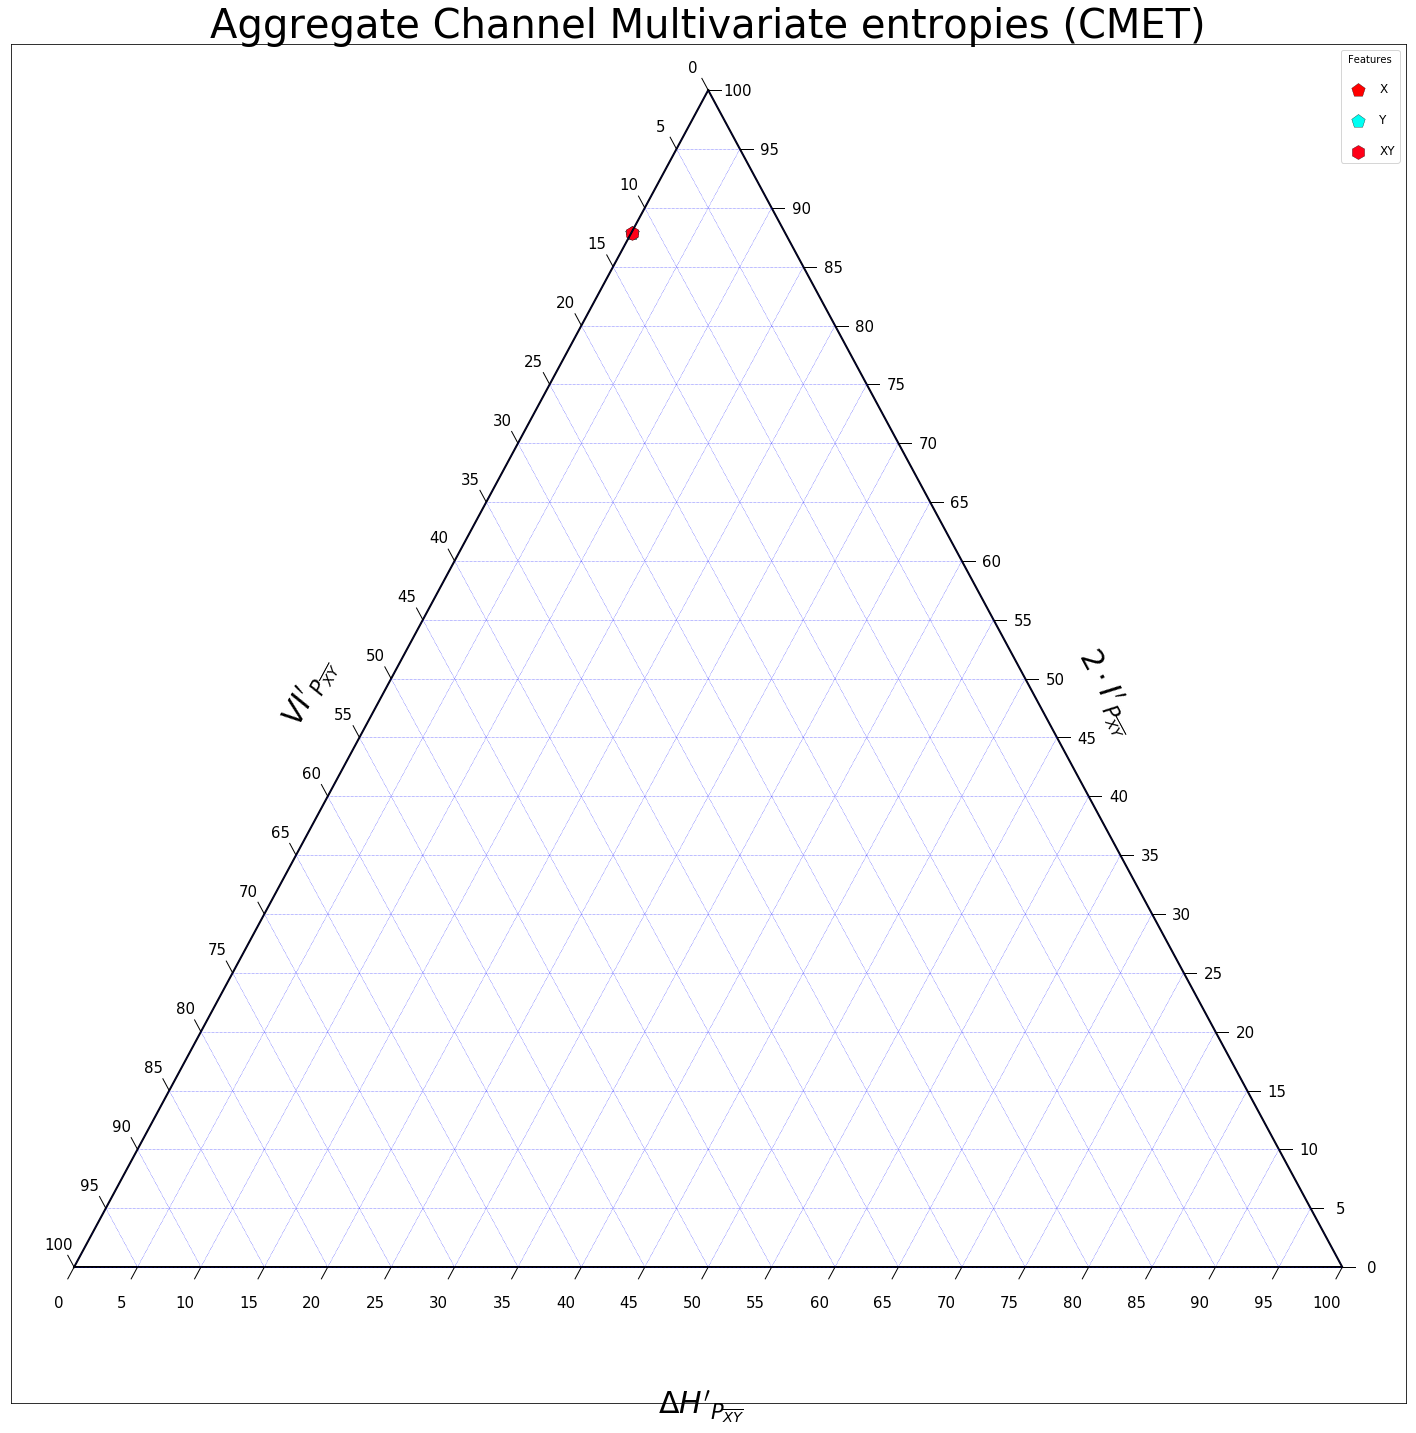

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
x = neigh.predict(X_test)
neigh.score(X_test , y_test)
sol = pd.crosstab(index =y_test , columns= x).sort_index()
sol = sol.as_matrix()
edf = jentropies_table(sol)
etplot(edf , s_mk= 200)